In [ ]:
# the basic box-cox concept is given by this formula 
# they are applicable to the strictly the number greater than 0 
# the result after the transformation is between the -5 to 5 

def box_cox_transform(y, lambda_):
    if lambda_ == 0:
        return np.log(y)
    else:
        return (y ** lambda_ - 1) / lambda_

In [ ]:
# it can be applied to both the negative and the positive number and 
# it is the modified version of the box-cox transform 


def yeo_johnson_transform(y, lambda_):
    if y >= 0:
        if lambda_ == 0:
            return np.log1p(y)
        else:
            return ((y + 1) ** lambda_ - 1) / lambda_
    else:
        if lambda_ == 2:
            return -np.log1p(-y)
        else:
            return -((-y + 1) ** (2 - lambda_) - 1) / (2 - lambda_)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
X= df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Applying Regression without any transformation 

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [13]:
# cross checking with cross val score 

lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628683)

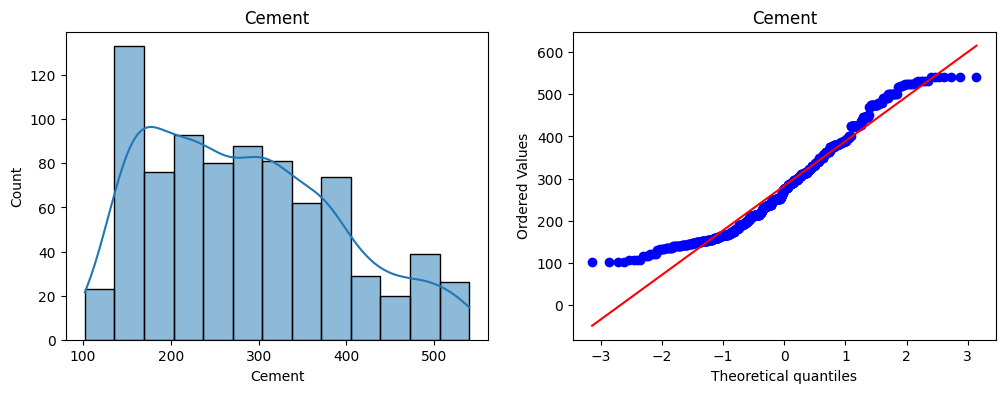

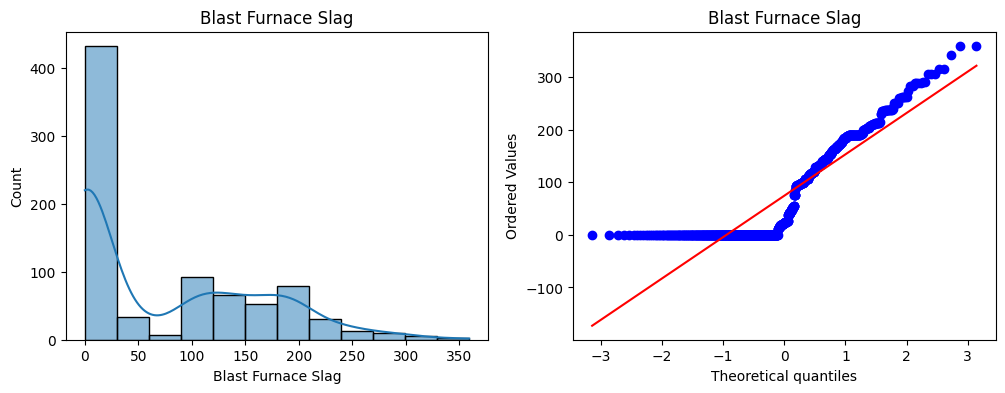

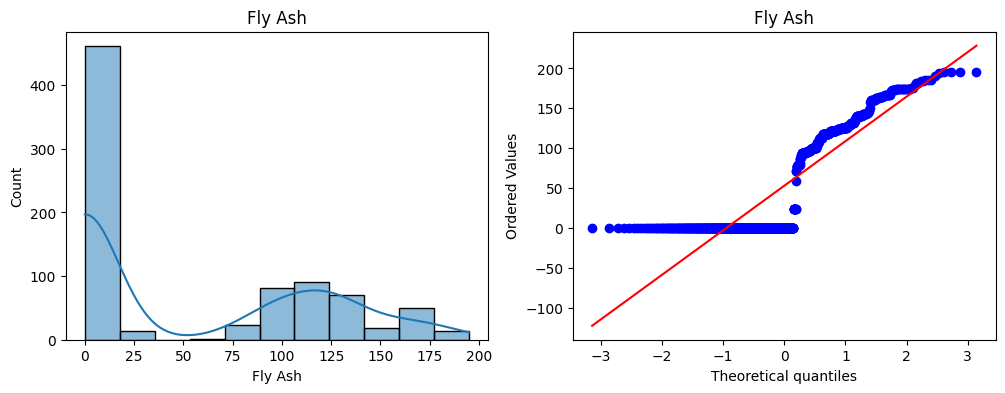

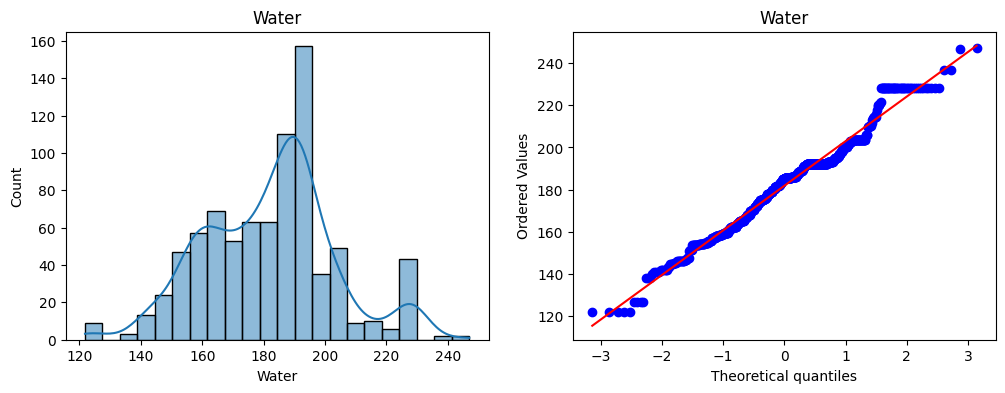

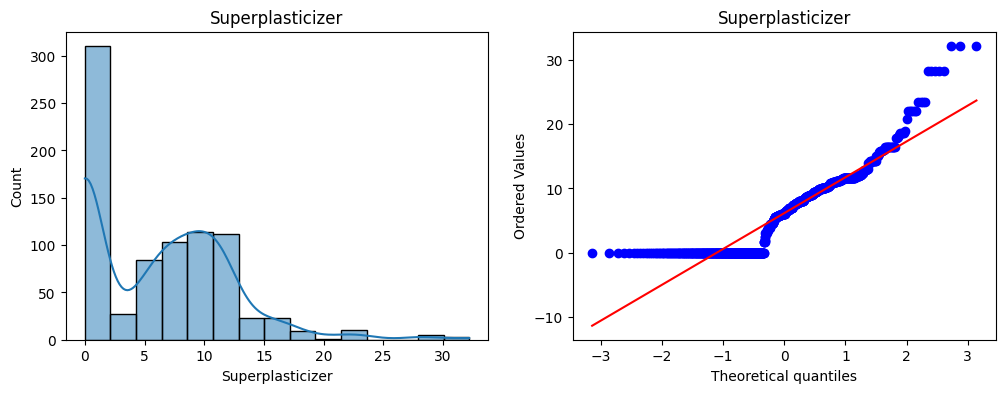

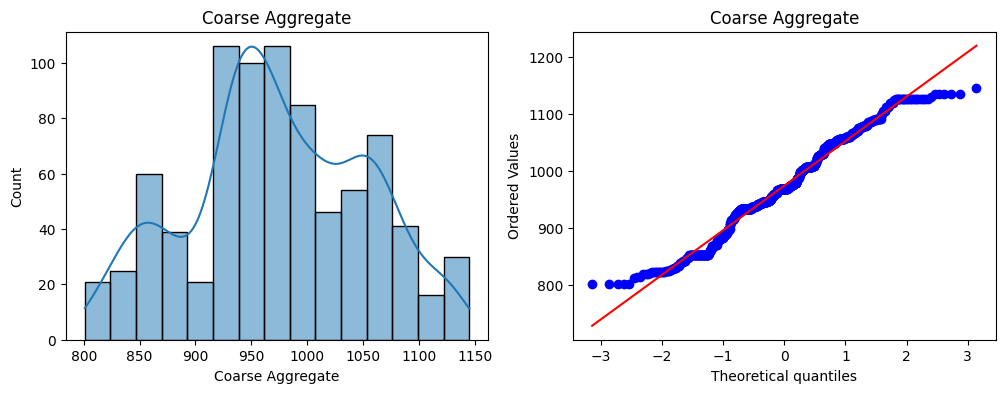

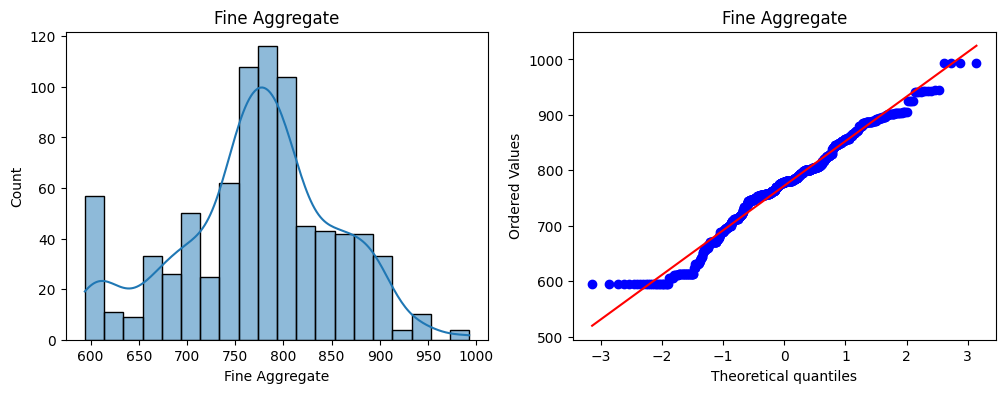

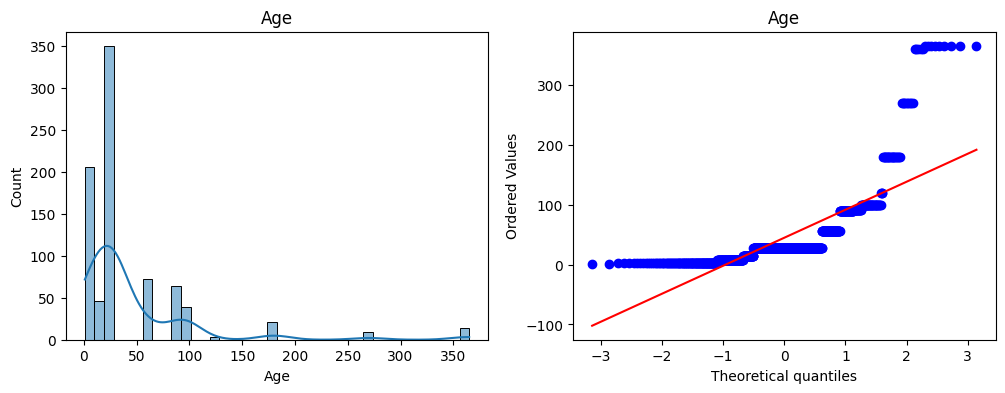

In [19]:
# plotting the displots without any transformation 

for col in X_train.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [20]:
# Applying the Box-Cox transform 

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.0000001)
X_test_transformed = pt.transform(X_test+0.0000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772682
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [21]:
# 
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8042534513415571

In [22]:
# using cross val score 
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537952683781)

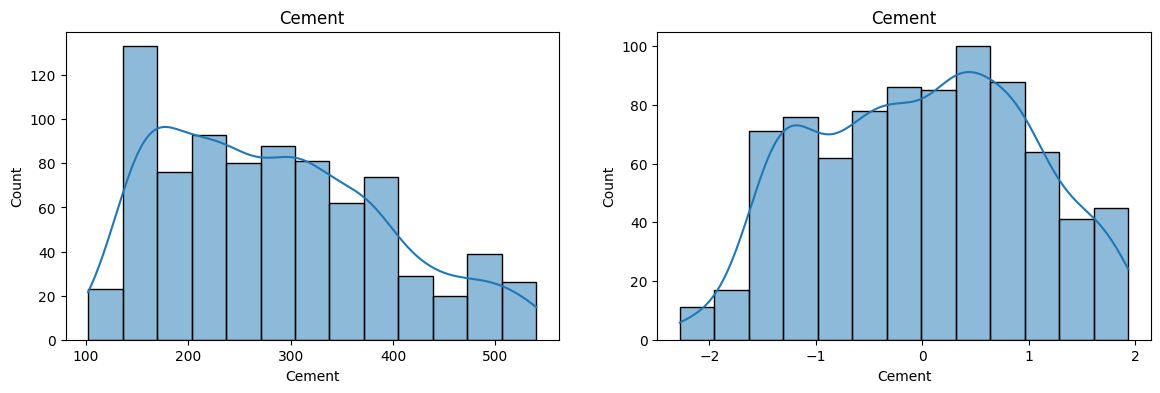

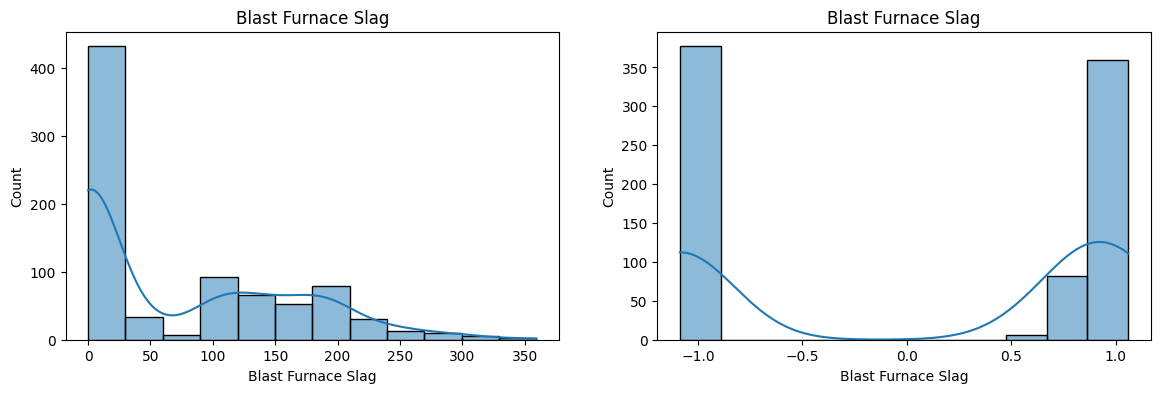

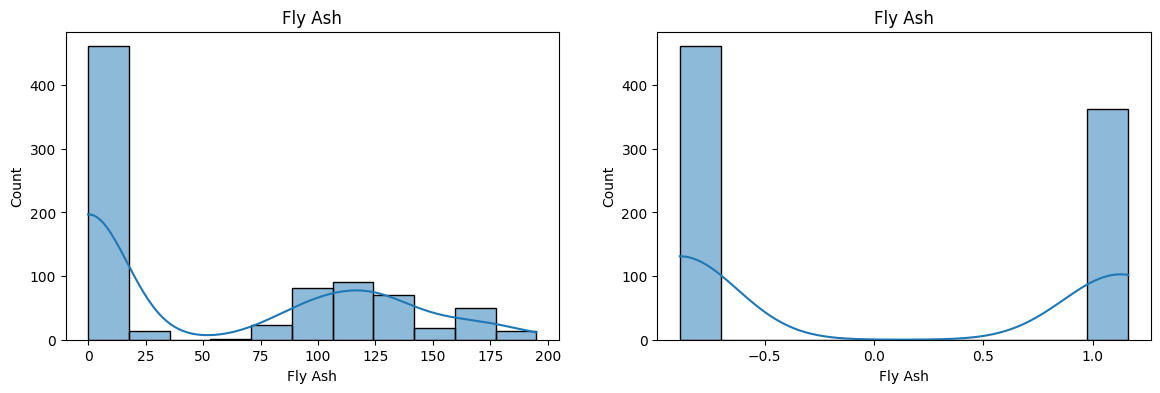

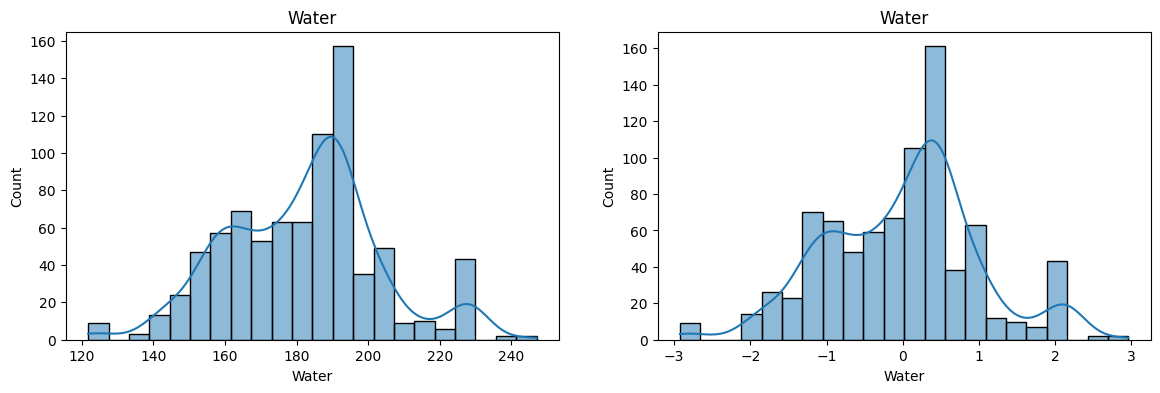

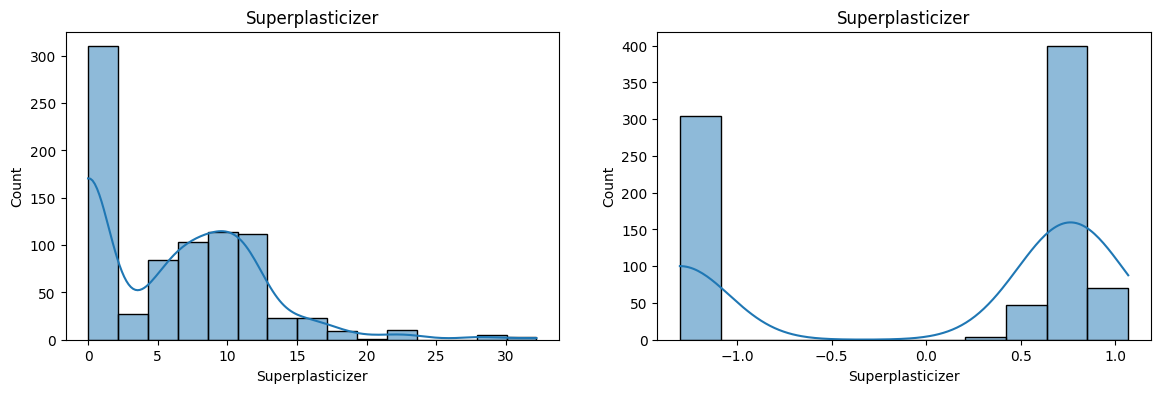

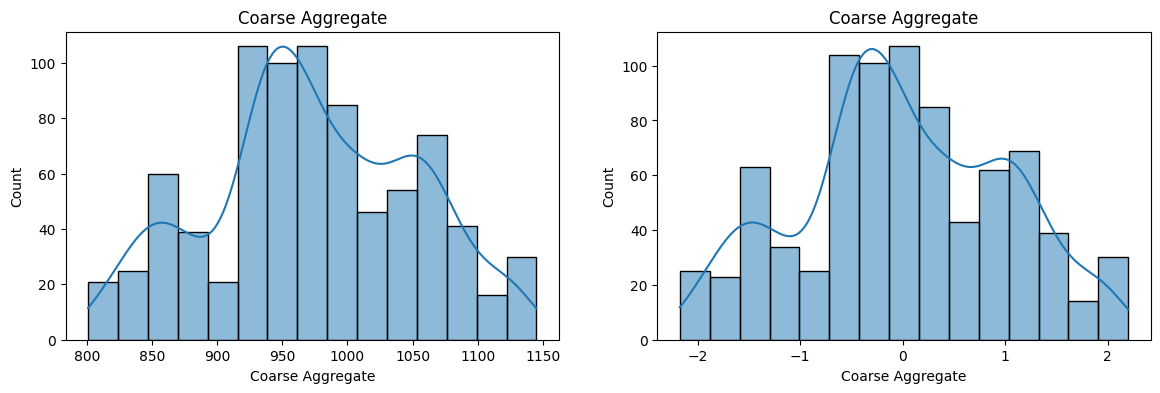

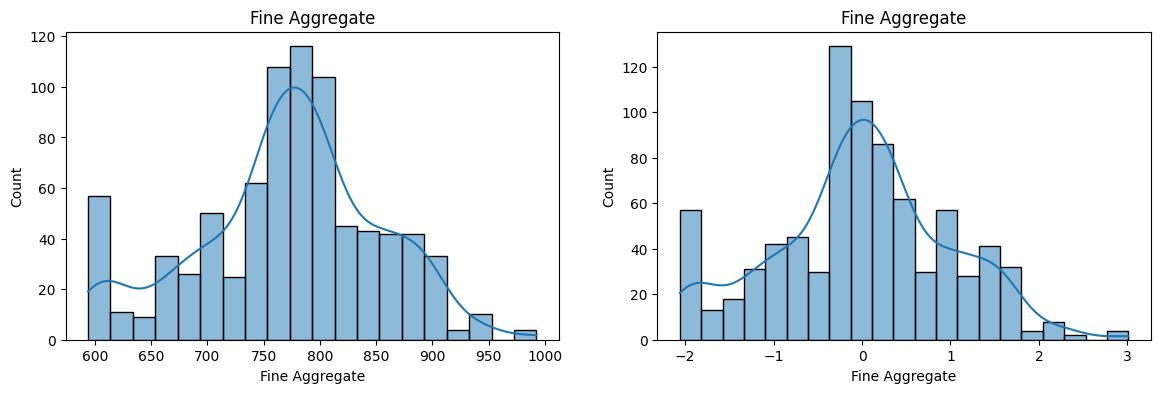

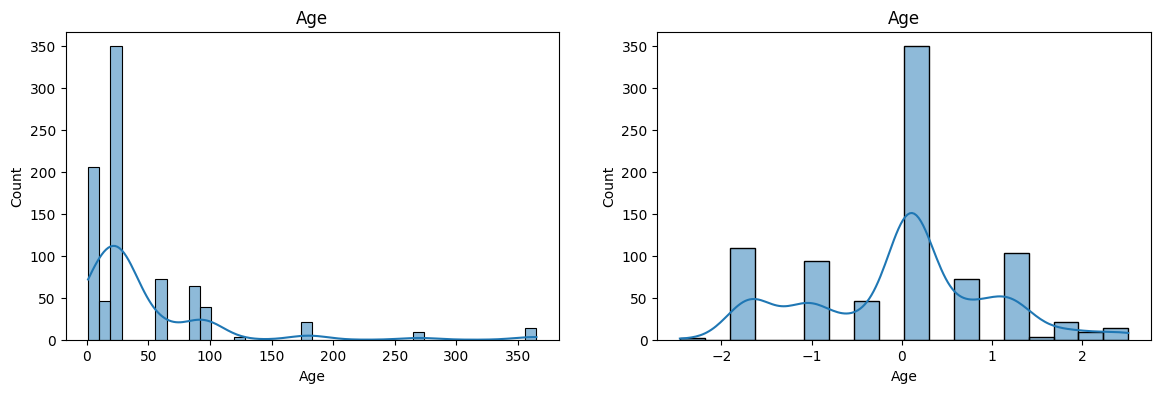

In [24]:
# mefore and after comparision for Box-Cox transform

X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde = True)
    plt.title(col)

    plt.show()

In [26]:
pt1 = PowerTransformer()


X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred2))
pd.DataFrame({'cols':X_train.columns,'Yeo_Jhonson_lambdas':pt.lambdas_})


0.8042534513415571


,cols,Yeo_Jhonson_lambdas
0,Cement,0.172271
1,Blast Furnace Slag,0.022924
2,Fly Ash,-0.028797
3,Water,0.809568
4,Superplasticizer,0.087911
5,Coarse Aggregate,1.129167
6,Fine Aggregate,1.829625
7,Age,0.048975


In [28]:
# applying cross val score 

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625134285742)

In [29]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

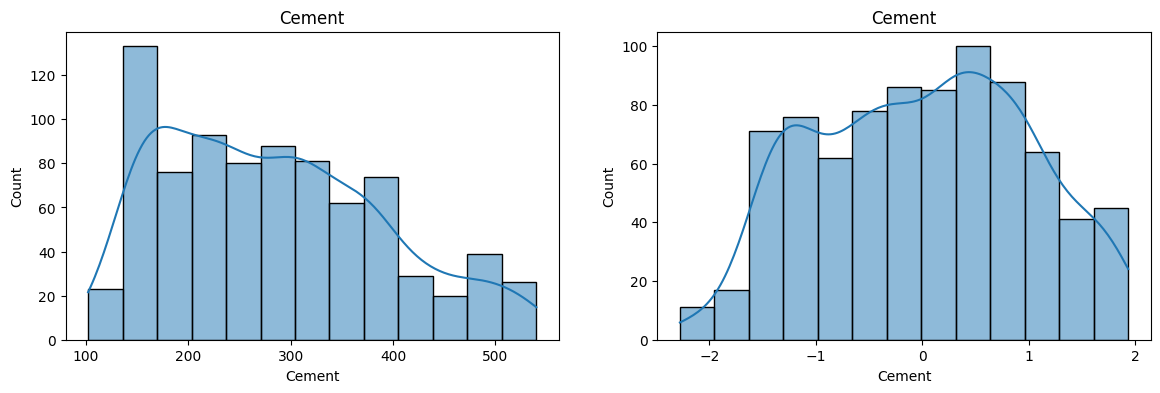

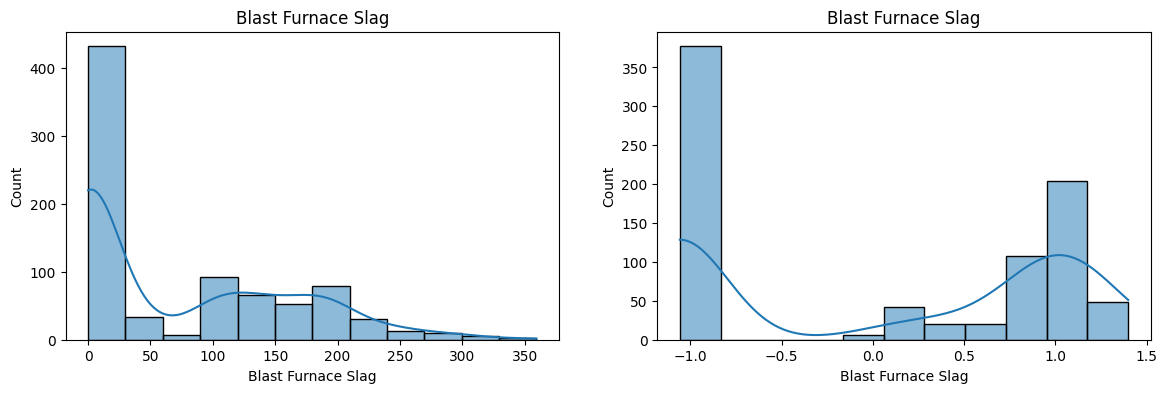

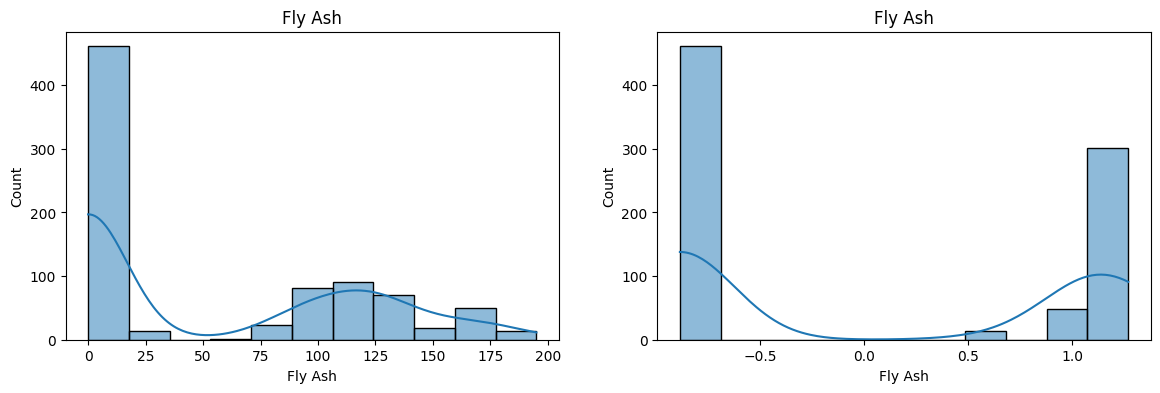

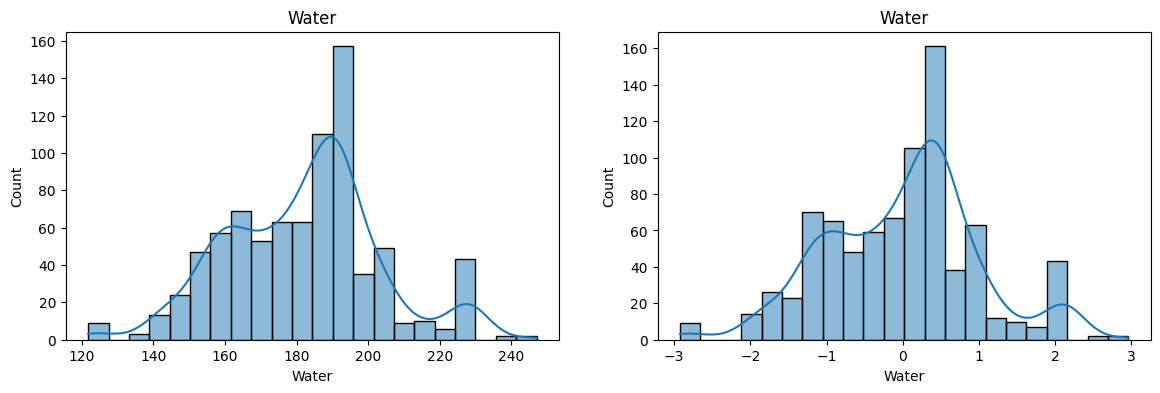

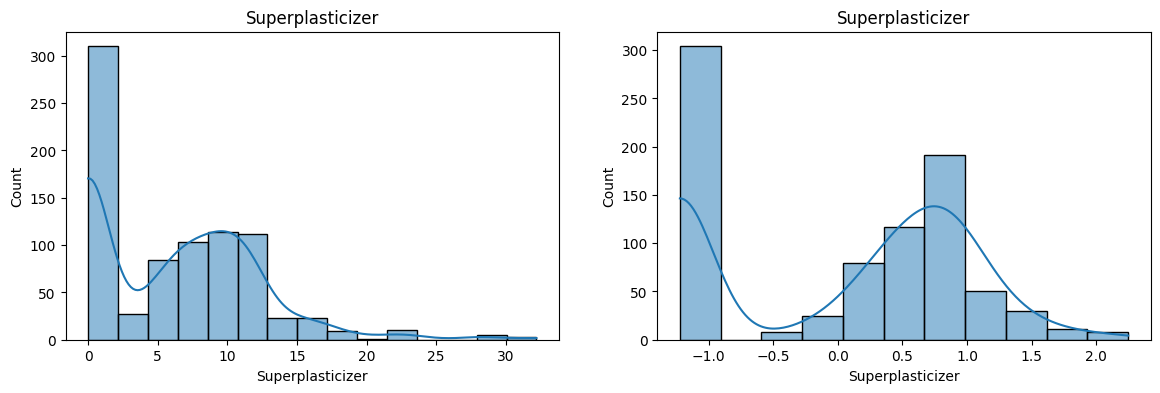

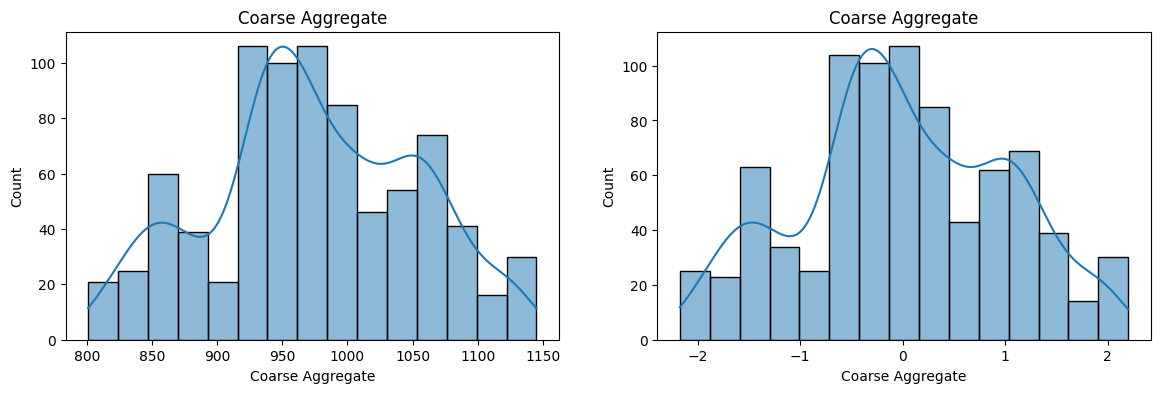

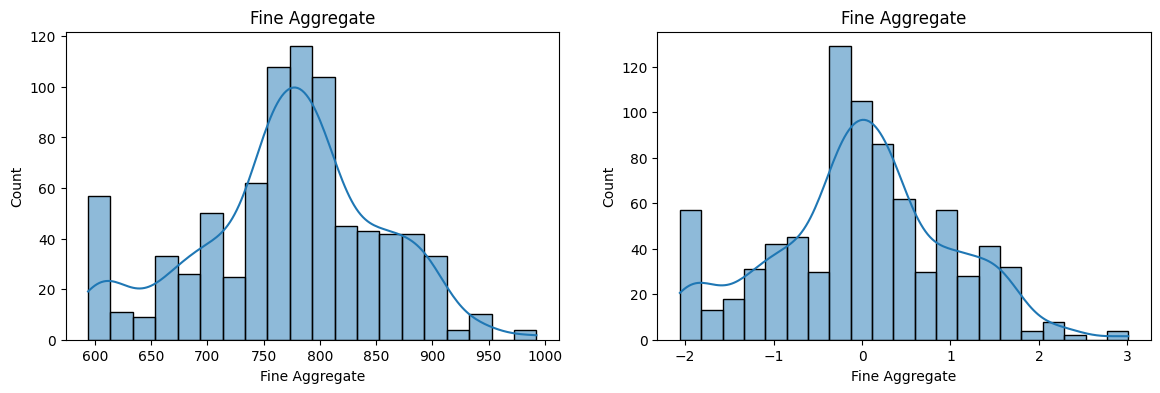

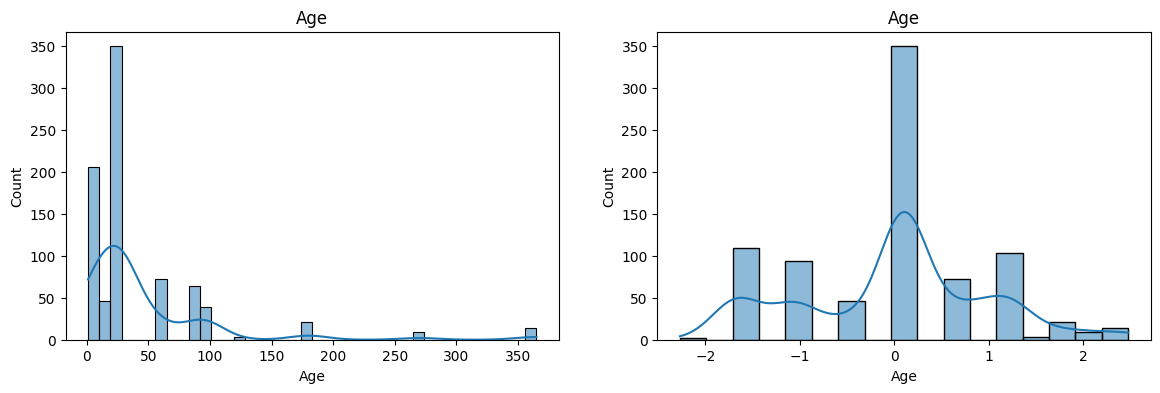

In [30]:
# Before and the after  comparison of the Yeo jhonsons transform 
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde = True)
    plt.title(col)

    plt.show()

